In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import logging
logging.basicConfig(level=logging.ERROR)
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_euclidean_glove/" /content/

In [ ]:
!pip install transformers==2.8.0

     |████████████████████████████████| 573kB 4.2MB/s 
     |████████████████████████████████| 3.7MB 40.4MB/s 
     |████████████████████████████████| 133kB 42.2MB/s 
     |████████████████████████████████| 1.1MB 41.8MB/s 
     |████████████████████████████████| 890kB 40.3MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 6.8MB 40.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=1860b35d5352c61c20f3efb04a1abf83ad64f5296204d3007c06fdaaf142d3d4
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
ERROR: botocore 1.19.18 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.


In [ ]:
!pip install tensorflow==1.13.1

In [ ]:
!pip install git+https://github.com/geoopt/geoopt.git
! pip install git+https://github.com/ferrine/hyrnn.git

  Cloning https://github.com/geoopt/geoopt.git to /tmp/pip-req-build-merufyva
  Running command git clone -q https://github.com/geoopt/geoopt.git /tmp/pip-req-build-merufyva
  Created wheel for geoopt: filename=geoopt-0.3.1-cp36-none-any.whl size=73075 sha256=71fdcb042efcaf63d0944c8967156b5aaf01dffbb0712f159b918a2e0645e703
  Stored in directory: /tmp/pip-ephem-wheel-cache-w_db56g0/wheels/10/df/30/e0d857f034c142ca5f38af048b62aae3da773b272553e5dd21
Successfully built geoopt
  Cloning https://github.com/ferrine/hyrnn.git to /tmp/pip-req-build-863_n5m9
  Running command git clone -q https://github.com/ferrine/hyrnn.git /tmp/pip-req-build-863_n5m9
  Created wheel for hyrnn: filename=hyrnn-0.0.0-cp36-none-any.whl size=13955 sha256=4a226d0db6c631c4fa9d38e92938687e6d29743fac8b734e32b3f59c5eee0123
  Stored in directory: /tmp/pip-ephem-wheel-cache-uil1c1lj/wheels/24/c3/64/cc0e9d25d466081dc154a2a8843157f54d845b916b4ba66418
Successfully built hyrnn





# Data Preparation

In [ ]:
import pandas as pd
train_data = pd.read_csv("train_taxonomy_prediction.csv")
val_data = pd.read_csv("validation_taxonomy_prediction.csv")
test_data = pd.read_csv("test_taxonomy_prediction.csv")

train_data


,board_syllabus,question_answer
0,social science>>geography : our environment>>w...,Identify the different processes involved in ...
1,social science>>history : our pasts - iii>>wea...,The word &#39;Chintz&#39; comes from which la...
2,social science>>civics : social and political ...,Which disease is responsible for the deaths o...
3,social science>>civics : social and political ...,Patients usually have to wait for hours in the...
4,science>>components of food,How can deficiency diseases be prevented? Def...
...,...,...
40890,science>>synthetic fibres and plastics,Name the monomer of polyester. Ester
40891,physics>>physics : part - ii>>ray optics and o...,"A convex lens and a concave lens, each having..."
40892,social science>>history : india and the contem...,Peasants who opposed collectivisation and res...
40893,"science>>garbage in, garbage out",Cancer is one of the fatal diseases causeddue...


In [ ]:
from google.colab import files

In [ ]:
import re
def clean_sentence(question):
  # print(question)
  question = re.sub('<[^>]*>', ' ',question)
  question = re.sub(' +', ' ', question)
  question = re.sub('\xa0','',question)
  question = question.rstrip()
  question = re.sub('nan','',question)
  question = re.sub(u'\u2004','',question)
  question = re.sub(u'\u2009','',question)

  # question = question.decode("utf-8")
  # question = question.replace(u'\u200\d*','').encode("utf-8")
  question = re.sub('&nbsp','',question)
  question = re.sub('&ndash','',question)
  question = re.sub('\r','',question)
  question = re.sub('\t','',question)
  question = re.sub('\n',' ',question)

  question = re.sub('MathType@.*','',question)
  question = re.sub('&thinsp','',question)
  question = re.sub('&times','',question)
  question = re.sub('\u200b','',question)
  question = re.sub('&rarr;;;','',question)

  return question

In [ ]:
# final_data_1 = final_data.loc[0:71003,:]
# final_data_1

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Loading BERT tokenizer...


In [ ]:
train_data["board_syllabus"].value_counts()

science                                                                      493
science>>sound                                                               364
science>>life processes                                                      285
science>>acids, bases and salts                                              281
computer science>>introduction to computer                                   254
                                                                            ... 
social science>>civics : social and political life-i>>what is government?     85
physics>>physics : part - ii>>oscillations                                    83
physical science>>physical science (physics)>>force>>force                    83
science>>light, shadows and reflections                                       82
social science>>the mauryan empire>>the mauryan empire                        82
Name: board_syllabus, Length: 312, dtype: int64

In [ ]:

# from sklearn.preprocessing import LabelEncoder

# LE = LabelEncoder()
# final_data['label'] = LE.fit_transform(final_data['board_syllabus'])
# final_data.head()

In [ ]:
# def get_labels(prediction):
#     predicted_label =  LE.inverse_transform([prediction])
#     return predicted_label[0]

In [ ]:
# get_labels(330)

In [ ]:
# train_data = pd.concat([train_data,val_data])
# train_data

In [ ]:
train_features = train_data["question_answer"]
test_features = test_data["question_answer"]
train_labels = train_data["board_syllabus"]
test_labels = test_data["board_syllabus"]
val_features = val_data["question_answer"]
val_labels = val_data["board_syllabus"]

In [ ]:
train_labels.value_counts()

science                                                                      493
science>>sound                                                               364
science>>life processes                                                      285
science>>acids, bases and salts                                              281
computer science>>introduction to computer                                   254
                                                                            ... 
social science>>civics : social and political life-i>>what is government?     85
physics>>physics : part - ii>>oscillations                                    83
physical science>>physical science (physics)>>force>>force                    83
science>>light, shadows and reflections                                       82
social science>>the mauryan empire>>the mauryan empire                        82
Name: board_syllabus, Length: 312, dtype: int64

In [ ]:
test_labels.value_counts()

science                                                                                        54
science>>sound                                                                                 41
computer science>>introduction to computer                                                     37
computer science[c++]>>boolean algebra                                                         35
chemistry>>chemistry : part i>>surface chemistry                                               33
                                                                                               ..
social science>>geography : the earth our habitat>>india : climate, vegetation and wildlife     6
social science>>geography : contemporary india - ii>>forest and wildlife resources              5
social science>>india from 600 bc - 400 bc>>jainism and buddhism                                5
social science>>civics : social and political life>>the indian constitution                     5
science>>reproductio

In [ ]:

question_answer = train_features.values
categories = train_labels.values

In [ ]:
question_answer

array([' Identify the different processes involved in the &#39;water cycle&#39; from the options given below. i. Evaporation ii. Condensation iii. Sublimation iv. Precipitation i, ii and iv only',
       ' The word &#39;Chintz&#39; comes from which language? Hindi',
       ' Which disease is responsible for the deaths of 5 lakh people in India? Tuberculosis',
       ...,
       ' Peasants who opposed collectivisation and resisted the authorities were: deported and exiled',
       ' Cancer is one of the fatal diseases causeddue tothe harmful gases released during burning of plastic.',
       ' Fill in the blanks : (a) The process of transferring of charge from a charged object to the earth is called _____________. (b) The process of electric discharge can occur between two or more_______, or between ________ and the __________. (c) The uppermost layer of the earth called the _________. (a) E arthing (b) Clouds, clouds ,earth (c) C rust'],
      dtype=object)

In [ ]:
categories

array(['social science>>geography : our environment>>water',
       'social science>>history : our pasts - iii>>weavers, iron smelter & factory owners',
       'social science>>civics : social and political life - ii>>role of the government in health',
       ...,
       'social science>>history : india and the contemporary world - i>>socialism in europe and the russian revolution',
       'science>>garbage in, garbage out',
       'science>>some natural phenomena'], dtype=object)

In [ ]:
# val_features = test_features.values
# val_labels = test_labels.values

In [ ]:

import numpy as np
!pip install inflection

from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin
from bokeh.models import HoverTool
from bokeh import colors
import inflection

from nltk.stem import PorterStemmer 
ps = PorterStemmer()
from gzip import open as gopen
from pandas.core.common import flatten
import gensim.models.poincare as poincare
def get_cleaned_taxonomy(taxonomy):
  cleaned_taxonomy = []
  for value in taxonomy:
      individual_tokens = []
      value = value.split(">>")
      for val in value:
        for token in val.split(' '):
          if token.isalpha():
            individual_tokens.append(token)
      cleaned_taxonomy.append( list(tok for tok in individual_tokens) )
      # cleaned_taxonomy.append( value )
  return cleaned_taxonomy

In [ ]:

# course_taxonomy

poincare_emb_data = get_cleaned_taxonomy(categories)
poincare_val = get_cleaned_taxonomy(val_labels)

In [ ]:
poincare_emb_data[2]

['social',
 'science',
 'civics',
 'social',
 'and',
 'political',
 'life',
 'ii',
 'role',
 'of',
 'the',
 'government',
 'in',
 'health']

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
wnl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import gensim.downloader as api
wv = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
np.mean(np.vstack([wv['hi'],wv['hello']]),axis=0).shape

(300,)

In [ ]:
taxonomy_vectors = []
for feature in poincare_emb_data:
  token_embeddings = []
  for token in feature:
    if token in wv:
      token_embeddings.append(wv[token])
  token_emb  = np.vstack(token_embeddings)
  taxonomy_vectors.append(np.mean(token_emb,axis=0))
taxonomy_vectors = np.vstack(taxonomy_vectors)
taxonomy_vectors.shape

(40895, 300)

In [ ]:
taxonomy_vectors_val = []
for feature in poincare_val:
  token_embeddings = []
  for token in feature:
      if token in wv:
        token_embeddings.append(wv[token])
  token_emb  = np.vstack(token_embeddings)
  taxonomy_vectors_val.append(np.mean(token_emb,axis=0))
taxonomy_vectors_val = np.vstack(taxonomy_vectors_val)
taxonomy_vectors_val.shape

(2153, 300)

In [ ]:
test_data

,board_syllabus,question_answer
0,physics>>physics : part - ii,(a) Describe a simple experiment (or activity...
1,social science>>geography : the earth our habi...,What is the average weather in a place over m...
2,science>>diversity in living organisms,Which of the following is correct for the cha...
3,physics>>physics : part - i>>physical world,The branch of Physics that deals with the mic...
4,social science>>history : our pasts - iii>>tri...,Why did tribals view traders as a major cause...
...,...,...
4779,political science>>political science : indian ...,Which one of the following is not true about ...
4780,science>>tissues,Which of the following is a fluid matrix of t...
4781,computer science[c++]>>programming methodology,Program formatting has more effect when a con...
4782,chemistry>>chemistry : part i>>solutions,Cryoscopic constant is related to depression i...


In [ ]:
# np.array(poincare_embedding).shape

In [ ]:
input_ids = []
attention_masks = []

for sent in question_answer:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

Original:   Identify the different processes involved in the &#39;water cycle&#39; from the options given below. i. Evaporation ii. Condensation iii. Sublimation iv. Precipitation i, ii and iv only
Token IDs: tensor([  101,  6709,  1996,  2367,  6194,  2920,  1999,  1996,  1004,  1001,
         4464,  1025,  2300,  5402,  1004,  1001,  4464,  1025,  2013,  1996,
         7047,  2445,  2917,  1012,  1045,  1012,  9345, 17822,  3370,  2462,
         1012, 24707,  3619,  3370,  3523,  1012,  4942, 17960,  3370,  4921,
         1012, 13511,  1045,  1010,  2462,  1998,  4921,  2069,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           

In [ ]:
input_ids_val = []
attention_masks_val = []

for sent in val_features:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_val.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_val.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_val = torch.cat(input_ids_val, dim=0)
attention_masks_val = torch.cat(attention_masks_val, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

Original:   Identify the different processes involved in the &#39;water cycle&#39; from the options given below. i. Evaporation ii. Condensation iii. Sublimation iv. Precipitation i, ii and iv only
Token IDs: tensor([  101,  6709,  1996,  2367,  6194,  2920,  1999,  1996,  1004,  1001,
         4464,  1025,  2300,  5402,  1004,  1001,  4464,  1025,  2013,  1996,
         7047,  2445,  2917,  1012,  1045,  1012,  9345, 17822,  3370,  2462,
         1012, 24707,  3619,  3370,  3523,  1012,  4942, 17960,  3370,  4921,
         1012, 13511,  1045,  1010,  2462,  1998,  4921,  2069,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           

In [ ]:
num_classes = len(list(set(categories)))
num_classes

312

In [ ]:
from torch.utils.data import TensorDataset, random_split
train_poincare_tensor = torch.tensor(taxonomy_vectors,dtype=torch.float)
val_poincare_tensor = torch.tensor(taxonomy_vectors_val,dtype=torch.float)

val_dataset = TensorDataset(input_ids_val,attention_masks_val,val_poincare_tensor)
# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(input_ids, attention_masks, train_poincare_tensor)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

In [ ]:
# !pip install transformers==2.8.0
import transformers
print(transformers.__version__)

2.8.0


In [ ]:
import torch

In [ ]:
set(question_answer).intersection(set(test_features))

set()

In [ ]:

import sys
import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
from torch.nn.modules.loss import HingeEmbeddingLoss
from random import randint

from tqdm import tqdm
import geoopt
import time
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
from torch.nn.modules.loss import HingeEmbeddingLoss
from random import randint
import torch.nn.functional as F

import time
import argparse
cos = nn.CosineSimilarity(dim=0, eps=1e-6)
# Neural Classifierwork
class MulticlassClassifier(nn.Module):
    def __init__(self,bert_model_path):
        super(MulticlassClassifier,self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=False,output_attentions=False)
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(768, 384)
        self.fc2 = nn.Linear(384, 300)

    def forward(self,tokens,masks):
        _, pooled_output = self.bert(tokens, attention_mask=masks)
        x = self.fc1(pooled_output)
        x = self.fc2(x)
        return x

class MyHingeLoss(torch.nn.Module):
    def __init__(self, margin):
        super(MyHingeLoss, self).__init__()
        self.margin = margin
    # def forward_val(self, output, target):
    #     cos = nn.CosineSimilarity(dim=0, eps=1e-6)
    #     loss = 0
    #     num_compare = 4
    #     count = 0
    #     for i in range(len(output)):
    #         v_image = output[i]
    #         t_label = target[i]
    #         for j in range(num_compare):
    #             if j != i:
    #                 count += 1
    #                 t_j = target[j]
    #                 loss += torch.relu( self.margin - cos(t_label, v_image) + cos(t_j, v_image) )
    #     return loss / count
    def forward(self, output, target):
        loss=0
        for i in range(len(output)):
            v_image = F.normalize(output[i],p=2,dim=0)
            t_label = F.normalize(target[i],p=2,dim=0)
            j = randint(0, len(output)-1)
            while j == i:
                j = randint(0, len(output)-1)
            t_j = F.normalize(target[j],p=2,dim=0)
            loss+= torch.relu( self.margin - cos(t_label, v_image) + cos(t_j, v_image) )
        return loss / len(output)



In [ ]:
from transformers import BertModel, AdamW, BertConfig
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


# Training

In [ ]:
from transformers import BertModel, AdamW, BertConfig

# Loads BertModel, the pretrained BERT model with a single 
model = MulticlassClassifier('bert-base-uncased')
# model.load_state_dict(torch.load('model_euclidean_glove/model_weights'))

# Tell pytorch to run this model on the GPU.
model.cuda()


MulticlassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
# mobius_params = []
# bert_params = []

# def mobius_params():
#   for param in model.named_parameters():
#     if 'fc' in param[0]:
#       yield param[1]
# def bert_params():
#   for param in model.named_parameters():
#     if 'bert' in param[0]:
#       yield param[1]


In [ ]:
optimizer_1 = torch.optim.AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
# optimizer_2 = radam_.RiemannianAdam(mobius_params(), lr=0.01, stabilize=10)

In [ ]:
from transformers import get_linear_schedule_with_warmup


epochs = 30

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_dataloader) * epochs



In [ ]:
len(train_dataloader) 

1278

In [ ]:
1935 * 32

61920

In [ ]:
scheduler = get_linear_schedule_with_warmup(optimizer_1, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
# import numpy as np

# # Function to calculate the accuracy of our predictions vs labels
# def flat_accuracy(preds, labels):
#     pred_flat = np.argmax(preds, axis=1).flatten()
#     labels_flat = labels.flatten()
#     return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
criterion = MyHingeLoss(0.1)


In [ ]:
import random
import numpy as np
import json
from sklearn.metrics import f1_score
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()
early_stopping = EarlyStopping(patience=4, verbose=True)

# For each epoch...
for epoch_i in range(0, epochs):
    


    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0


    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))


        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)


        model.zero_grad() 
        optimizer_1.zero_grad()       

        logits = model(b_input_ids, 
                             b_input_mask)
        
        loss = criterion.forward(logits,b_labels)

  
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer_1.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_f1 = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        


          logits = model(b_input_ids, 
                              b_input_mask)
          
        loss = criterion(logits,b_labels)

            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy().round()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        # total_eval_f1 += f1_score(label_ids,logits, average='macro')
        

    # Report the final accuracy for this validation run.
    # avg_val_accuracy = total_eval_f1 / len(validation_dataloader)
    # print("  f1score: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    early_stopping(avg_val_loss, model)
    if early_stopping.early_stop:
      print("Early stopping")
      break  
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))
    output_dir = 'model_euclidean_glove/'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    print("Saving model to %s" % output_dir)
    tokenizer.save_pretrained(output_dir)
    torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))

    !rm -rf "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_euclidean_glove"
    !mv model_euclidean_glove "/content/drive/My Drive/research_lo_content_taxonomy_classification/"
    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 30 ========
Training...
  Batch    40  of  1,278.    Elapsed: 0:00:26.
  Batch    80  of  1,278.    Elapsed: 0:00:51.
  Batch   120  of  1,278.    Elapsed: 0:01:17.
  Batch   160  of  1,278.    Elapsed: 0:01:43.
  Batch   200  of  1,278.    Elapsed: 0:02:08.
  Batch   240  of  1,278.    Elapsed: 0:02:34.
  Batch   280  of  1,278.    Elapsed: 0:02:59.
  Batch   320  of  1,278.    Elapsed: 0:03:25.
  Batch   360  of  1,278.    Elapsed: 0:03:50.
  Batch   400  of  1,278.    Elapsed: 0:04:16.
  Batch   440  of  1,278.    Elapsed: 0:04:41.
  Batch   480  of  1,278.    Elapsed: 0:05:07.
  Batch   520  of  1,278.    Elapsed: 0:05:32.
  Batch   560  of  1,278.    Elapsed: 0:05:58.
  Batch   600  of  1,278.    Elapsed: 0:06:23.
  Batch   640  of  1,278.    Elapsed: 0:06:49.
  Batch   680  of  1,278.    Elapsed: 0:07:15.
  Batch   720  of  1,278.    Elapsed: 0:07:40.
  Batch   760  of  1,278.    Elapsed: 0:08:06.
  Batch   800  of  1,278.    Elapsed: 0:08:31.
  Batch   840  o

In [ ]:
!mv model_euclidean_glove "/content/drive/My Drive/research_lo_content_taxonomy_classification/"


In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Training Time,Validation Time
epoch,,,,
1,3.19e-03,5.95e-03,0:13:36,0:00:13
2,2.79e-03,5.85e-03,0:13:32,0:00:13
3,2.55e-03,4.65e-03,0:13:33,0:00:14
4,2.35e-03,4.43e-03,0:13:35,0:00:14
5,2.40e-03,5.85e-03,0:13:33,0:00:12
6,2.26e-03,5.05e-03,0:13:30,0:00:12
7,2.12e-03,5.06e-03,0:13:34,0:00:12


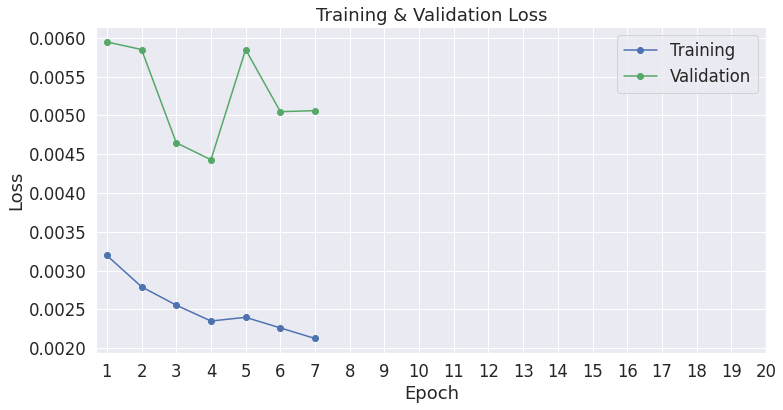

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.show()

In [ ]:
import os


output_dir = 'model_euclidean_glove/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)


# model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
# model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to model_euclidean_glove/


('model_euclidean_glove/vocab.txt',
 'model_euclidean_glove/special_tokens_map.json',
 'model_euclidean_glove/added_tokens.json')

In [ ]:
# !pip install joblib
# import joblib
# joblib.dump(LE, "label_encoder")


In [ ]:
import json
torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))


In [ ]:
# with open(os.path.join(output_dir, 'model_config.json'), 'w') as f:
#     json.dump(model.config, f)

In [ ]:
!zip -r model_euclidean_glove.zip model_euclidean_glove
# files.download('model_euclidean_1.zip')

updating: model_euclidean_glove/ (stored 0%)
updating: model_euclidean_glove/tokenizer_config.json (stored 0%)
updating: model_euclidean_glove/vocab.txt (deflated 53%)
updating: model_euclidean_glove/special_tokens_map.json (deflated 40%)
updating: model_euclidean_glove/model_weights (deflated 7%)


In [ ]:
# !zip -r label_encoder_categorized_reduced.zip label_encoder
# files.download('label_encoder_categorized_reduced.zip')

# Inference

In [ ]:
test_features = test_features.values
labels = test_labels.values

In [ ]:
test_features

array([' (a) Describe a simple experiment (or activity) to show that the polarity of emf induced in a coil is always such that it tends to produce a current which opposes the change of magnetic flux that produces it. (b) The current flowing through an inductor of self inductance L is continuously increasing. Plot a graph showing the variation of (i) Magnetic flux versus the current (ii) Induced emf versus dI/dt (iii) Magnetic potential energy stored versus the current. /* Style Definitions */ table.MsoNormalTable {mso-style-name:"Table Normal"; mso-tstyle-rowband-size:0; mso-tstyle-colband-size:0; mso-style-noshow:yes; mso-style-priority:99; mso-style-qformat:yes; mso-style-parent:""; mso-padding-alt:0in 5.4pt 0in 5.4pt; mso-para-margin-top:0in; mso-para-margin-right:0in; mso-para-margin-bottom:10.0pt; mso-para-margin-left:0in; line-height:115%; mso-pagination:widow-orphan; font-size:11.0pt; font-family:"Calibri","sans-serif"; mso-ascii-font-family:Calibri; mso-ascii-theme-font:minor-l

In [ ]:
labels

array(['physics>>physics : part - ii',
       'social science>>geography : the earth our habitat>>india : climate, vegetation and wildlife',
       'science>>diversity in living organisms', ...,
       'computer science[c++]>>programming methodology',
       'chemistry>>chemistry : part i>>solutions',
       'science>>periodic classification of elements'], dtype=object)

In [ ]:
len(list(set(labels)))

312

In [ ]:

# course_taxonomy all 312 targets which are common taxonomy and encompasses all for K12 education data considered
test_labels = list(set(labels))
poincare_emb_data = get_cleaned_taxonomy(test_labels)

In [ ]:
# import sent2vec
# s2v_model = sent2vec.Sent2vecModel()
# s2v_model.load_model('torontobooks_unigrams.bin')

In [ ]:
taxonomy_vectors = []
for feature in poincare_emb_data:
  token_embeddings = []
  for token in feature:
    if token in wv:
      token_embeddings.append(wv[token])
  token_emb  = np.vstack(token_embeddings)
  taxonomy_vectors.append(np.mean(token_emb,axis=0))
taxonomy_vectors = np.vstack(taxonomy_vectors)
taxonomy_vectors.shape

(312, 300)

In [ ]:
model = MulticlassClassifier('bert-base-uncased')
model.load_state_dict(torch.load('model_euclidean_glove/model_weights'))
model.cuda()

In [ ]:
test_input_ids = []
test_attention_masks = []
for sent in test_features:

    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    test_input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    test_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)
# labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  
test_poincare_tensor = torch.tensor(taxonomy_vectors,dtype=torch.float)

# Create the DataLoader.
# prediction_data = TensorDataset(test_input_ids, test_attention_masks, test_poincare_tensor)
# prediction_sampler = SequentialSampler(prediction_data)
# prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
test_poincare_tensor = torch.tensor(taxonomy_vectors,dtype=torch.float)


In [ ]:
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)
def dist_without_grad( u, v):
  sqdist = torch.sum((u - v) ** 2, dim=-1)
  squnorm = torch.sum(u ** 2, dim=-1)
  sqvnorm = torch.sum(v ** 2, dim=-1)
  x = 1 + 2 * sqdist / ((1 - squnorm) * (1 - sqvnorm)) + 1e-7
  z = torch.sqrt(x ** 2 - 1)
  return torch.log(x + z)

In [ ]:
test_labels = np.array(test_labels)

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

# Put model in evaluation mode
model.eval()
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)

input_ids = test_input_ids.to('cuda')
attention_masks = test_attention_masks.to('cuda')
test_poincare_tensor = test_poincare_tensor.to('cuda')
# Tracking variables 
predictions , true_labels = [], []
for input_id,attention_mask in zip(input_ids, attention_masks):
  with torch.no_grad():
    outputs = model(input_id.reshape(1,-1),attention_mask.reshape(1,-1))
    
  distances = cos(outputs,test_poincare_tensor)
  distances,indices = torch.topk(distances,20,largest=True)
  predictions.append(test_labels[indices.cpu().numpy()])
print(len(predictions))
  
print('    DONE.')
# predictions

Predicting labels for 4,784 test sentences...


In [ ]:
test_data["board_syllabus"].values

array(['physics>>physics : part - ii',
       'social science>>geography : the earth our habitat>>india : climate, vegetation and wildlife',
       'science>>diversity in living organisms', ...,
       'computer science[c++]>>programming methodology',
       'chemistry>>chemistry : part i>>solutions',
       'science>>periodic classification of elements'], dtype=object)

In [ ]:
np.where(test_labels=="physics>>physics : part - ii")

(array([11]),)

In [ ]:
predictions[0]

array(['physics>>physics : part - ii>>oscillations',
       'physics>>physics : part - ii',
       'physics>>physics : part - ii>>atoms',
       'physics>>physics : part - ii>>wave optics',
       'physics>>physics : part - ii>>communication systems'],
      dtype='<U116')

In [ ]:
labels=test_data['board_syllabus'].values

In [ ]:
from sklearn .preprocessing import LabelEncoder
LE= LabelEncoder()
labels = LE.fit_transform(labels)
labels

array([ 66, 237, 116, ...,  49,   8, 152])

In [ ]:
labels

array([ 66, 237, 116, ...,  49,   8, 152])

In [ ]:
final_predictions = []
for prediction in predictions:
  final_predictions.append(LE.transform(prediction))


In [ ]:
final_predictions[-1]

In [ ]:
final_predictions[0]

In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 20
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, k=20)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, k=20)

tmp_rank = tf.nn.top_k(y_pred, 20)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    # print("precision",sess.run(update_precision))
    # print("precision",s|ess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 15)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 15)

tmp_rank = tf.nn.top_k(y_pred, 15)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 15) (4784,)
precision 0.06117614269788183
update_recall:  0.9176421404682275
recall 0.9176421404682275
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4390.0, 394.0, 4390.0, 67370.0]
TMP_RANK:  TopKV2(values=array([[100,  82,  81, ...,  65,  62,  58],
       [243, 237, 236, ..., 219, 216, 215],
       [304, 303, 302, ..., 116,  52,  40],
       ...,
       [ 55,  54,  53, ...,  34,  30,  29],
       [ 84,  70,  62, ...,   6,   2,   0],
       [166, 165, 162, ...,   5,   3,   1]]), indices=array([[11, 12,  8, ..., 14,  6,  7],
       [ 1,  4,  7, ..., 13,  9,  6],
       [ 3,  6,  4, ...,  0, 14, 12],
       ...,
       [ 8, 14, 11, ..., 12, 10,  4],
       [12, 14, 10, ...,  1,  7,  8],
       [ 1,  9, 13, ...,  5,  3, 11]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 10)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 10)

tmp_rank = tf.nn.top_k(y_pred, 10)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 10) (4784,)
precision 0.08697742474916388
update_recall:  0.8697742474916388
recall 0.8697742474916388
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4161.0, 623.0, 4161.0, 43679.0]
TMP_RANK:  TopKV2(values=array([[ 81,  77,  74, ...,  66,  62,  58],
       [243, 237, 236, ..., 221, 216, 215],
       [304, 303, 302, ..., 188, 131, 116],
       ...,
       [ 55,  52,  51, ...,  38,  35,  29],
       [ 59,  58,  15, ...,   6,   2,   0],
       [166, 165, 152, ...,  11,   5,   3]]), indices=array([[8, 3, 9, ..., 1, 6, 7],
       [1, 4, 7, ..., 2, 9, 6],
       [3, 6, 4, ..., 7, 1, 0],
       ...,
       [8, 5, 9, ..., 6, 3, 4],
       [9, 6, 0, ..., 1, 7, 8],
       [1, 9, 0, ..., 4, 5, 3]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 5)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 5)

tmp_rank = tf.nn.top_k(y_pred, 5)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 5) (4784,)
precision 0.15167224080267558
update_recall:  0.7583612040133779
recall 0.7583612040133779
STREAM_VARS:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3628.0, 1156.0, 3628.0, 20292.0]
TMP_RANK:  TopKV2(values=array([[ 77,  73,  68,  67,  66],
       [243, 237, 228, 222, 221],
       [304, 302, 248, 131, 116],
       ...,
       [ 49,  42,  40,  35,  29],
       [ 15,  12,  10,   8,   6],
       [166, 152, 103,  11,   3]]), indices=array([[3, 0, 4, 2, 1],
       [1, 4, 3, 0, 2],
       [3, 4, 2, 1, 0],
       ...,
       [0, 2, 1, 3, 4],
       [0, 4, 3, 2, 1],
       [1, 0, 2, 4, 3]], dtype=int32))


In [ ]:
import tensorflow as tf
y_true = np.array(labels)
y_true = tf.identity(y_true)
y_pred = np.array(final_predictions)
y_pred = tf.identity(y_pred)
print(y_pred.shape,y_true.shape)
k = 8
recall, update_recall = tf.compat.v1.metrics.recall_at_top_k(y_true, y_pred, 1)
precision, update_precision = tf.compat.v1.metrics.precision_at_top_k(y_true, y_pred, 1)

tmp_rank = tf.nn.top_k(y_pred, 1)
stream_vars = [i for i in tf.local_variables()]

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    print("precision",sess.run(update_precision))
    # print("precision",sess.run(precision))

    print("update_recall: ",sess.run(update_recall ))
    print("recall",sess.run(recall))

    print("STREAM_VARS: ",(sess.run(stream_vars)))
    print("TMP_RANK: ",sess.run(tmp_rank))

(4784, 1) (4784,)
precision 0.3867056856187291
update_recall:  0.3867056856187291
recall 0.3867056856187291
STREAM_VARS:  [1850.0, 2934.0, 1850.0, 2934.0]
TMP_RANK:  TopKV2(values=array([[ 73],
       [222],
       [116],
       ...,
       [ 49],
       [ 15],
       [152]]), indices=array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32))


In [ ]:
y_true = np.array(labels)
final_predictions = np.array(final_predictions).squeeze()
final_predictions.shape
len(final_predictions[final_predictions==y_true])/len(labels)

0.44544314381270905

In [ ]:
categories

In [ ]:
!cp /content/model_euclidean_glove.zip "/content/drive/My Drive/research_lo_content_taxonomy_classification"